# Week4 - Lab

### Complete _todo_ parts in the following:

Lab Group: Cole, Aravind

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [3]:
df.head()

,X1,X2,y
0,0.000000,B,-0.780993
1,0.000628,A,3.223201
2,0.001257,A,5.082320
3,0.001885,B,3.857990
4,0.002514,B,1.104144


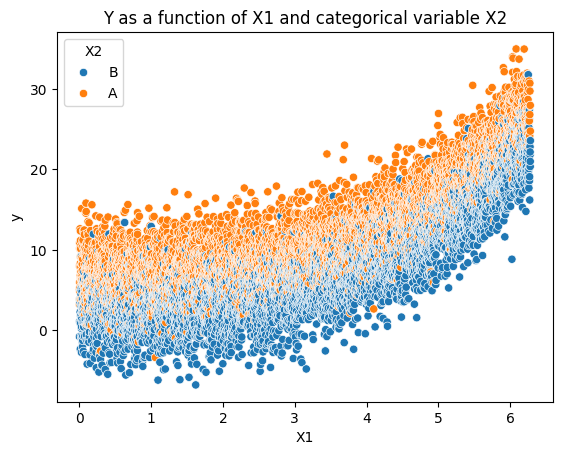

In [4]:
# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.title('Y as a function of X1 and categorical variable X2')
plt.show()

<Axes: title={'center': 'Y as a function of X1 and categorical variable X2'}, xlabel='X1', ylabel='y'>

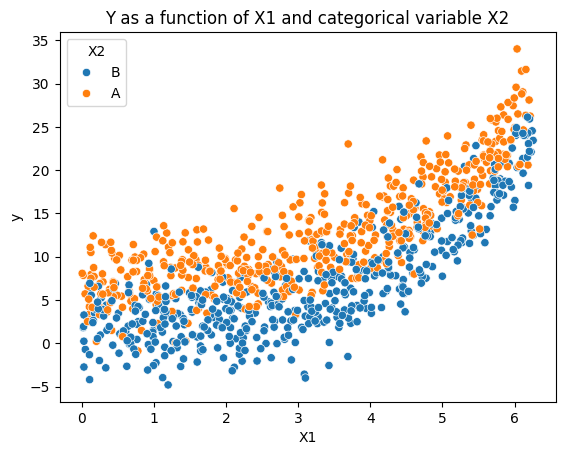

In [5]:
# todo: add the same title as above

plt.title('Y as a function of X1 and categorical variable X2')
sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo: 
There appears to be some sort of relationship between X1 and Y, but there also seems to be some impact that X2 has on Y, in that B tends to decrease Y

In [6]:
X = df[['X1', 'X2']]
y = df.y

In [7]:
X.head()

,X1,X2
0,0.000000,B
1,0.000628,A
2,0.001257,A
3,0.001885,B
4,0.002514,B


In [8]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.568327376525573

In [9]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.568327376525573

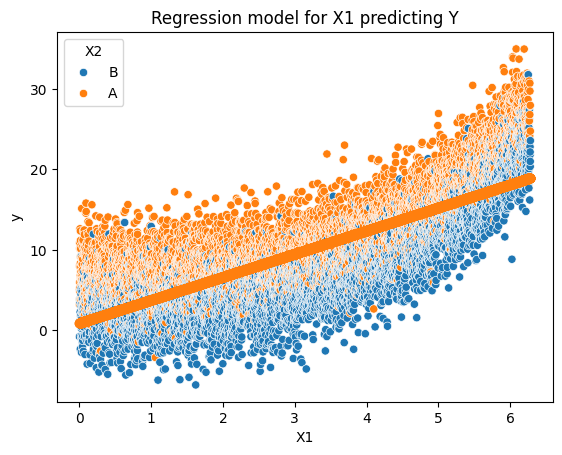

In [10]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X.X1, y) 
# plt.scatter(X.X1, y_pred)

# todo: add a proper title
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)
plt.title('Regression model for X1 predicting Y')
plt.show()

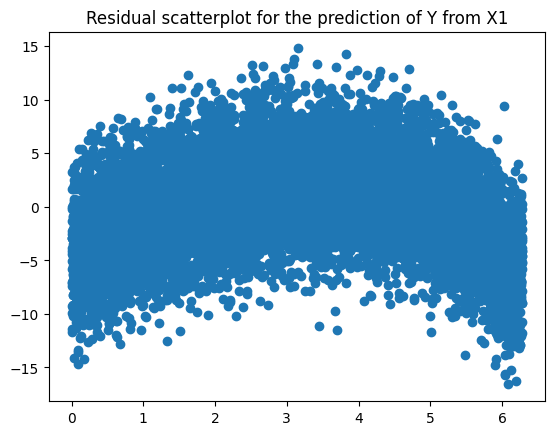

In [11]:
# todo: add a proper title

plt.scatter(X.X1, y_pred-y)
plt.title('Residual scatterplot for the prediction of Y from X1')
plt.show()

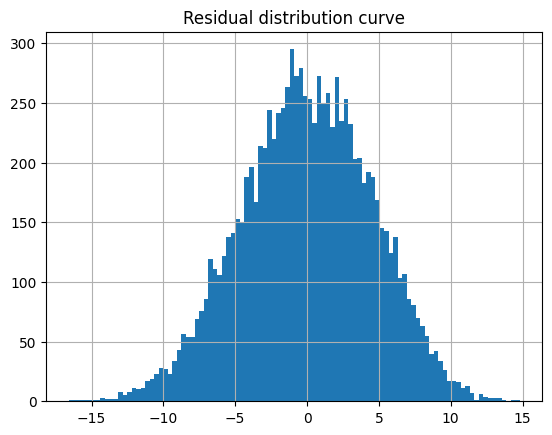

In [12]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('Residual distribution curve')
plt.show()

#### Todo: 
There appear to be a large degree of error within the model, one of the things we could try would be to transform the model to a second degree polynomial

In [13]:
# todo: explain the code below, what we do & why we do it? 
# The code below transforms the model into a second degree polynomial, which will hopefully improve accuracy

transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.6741810948132758

In [14]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6741810948132758

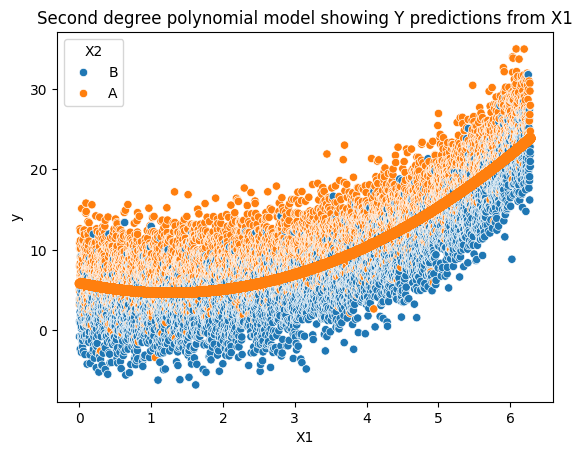

In [15]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_data[:, 1], y)
# plt.scatter(X_data[:, 1], y_pred)


# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)
plt.title('Second degree polynomial model showing Y predictions from X1')
plt.show()

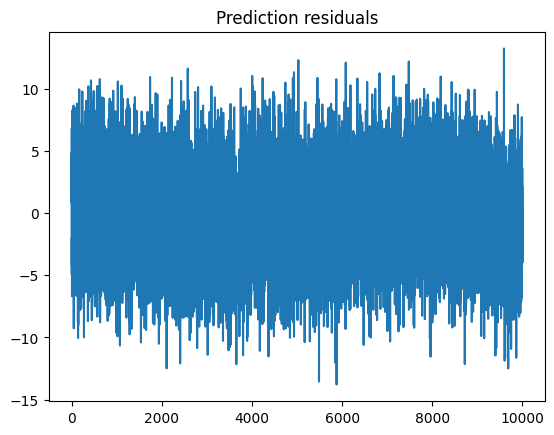

In [16]:
# todo: add a proper title

(y_pred-y).plot()
plt.title('Prediction residuals')
plt.show()

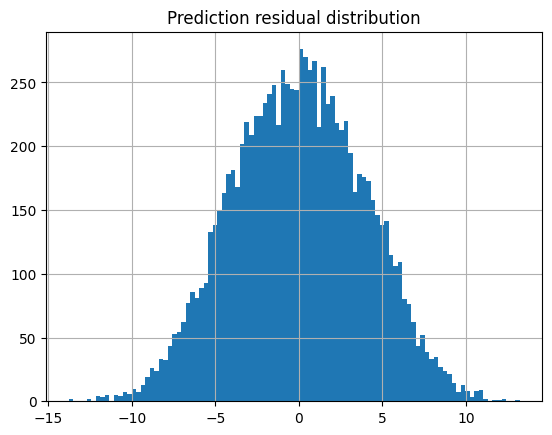

In [17]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('Prediction residual distribution')
plt.show()

### Todo:
Explain findings in the above graphs & what can we do next? 

There apprears to be less structure to the prediction residuals which means that the accuracy of the model has improved. Additionally, the prediction residual distribution appears to be a little bit more normal than in the linear model.

##  Finally:

In [18]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [19]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [20]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [21]:
encoded_df.head()

,X2_B
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0


In [22]:
# todo: explain the code

#This code will bring the two features together, such that we are now taking into account X2, in addition to X1. However,
#we are not adding an unnecessary column - because if X2 is not B, then we know it is A.

numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,1.0
1,0.000628,0.0
2,0.001257,0.0
3,0.001885,1.0
4,0.002514,1.0


In [23]:
# todo: explain the code

#This code then fits a new regression model to our updated dataset that is taking into account X2 and X1.

poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.8049226153054239

In [24]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8049226153054239

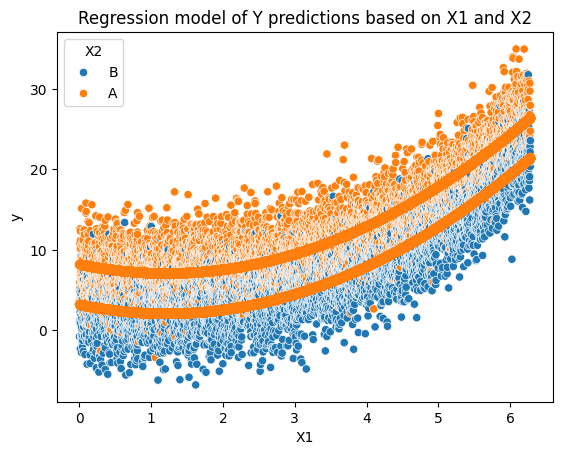

In [25]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)
plt.title('Regression model of Y predictions based on X1 and X2')
plt.show()

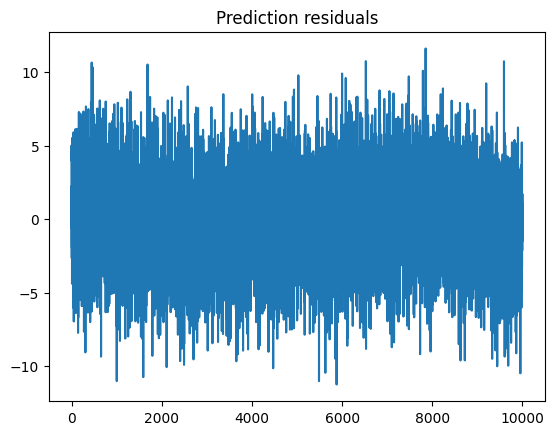

In [26]:
# todo: add a proper title

(y_pred-y).plot()
plt.title('Prediction residuals')
plt.show()

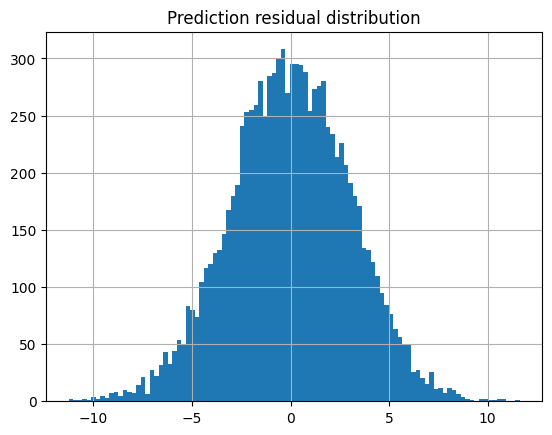

In [27]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('Prediction residual distribution')
plt.show()

#### Todo: 
explain results

This shows increased accuracy of the model, particularly with the seeming presence of a second regression line (even though this is still part of the same model), and a "tightened up" error distribution 

## Create a train-test split

In [28]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 8,000
Test samples: 2,000


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `transform` NOT `fit_transform` 
 
 __eg:__ `encoded = encoder.transform(X_test[categorical_features])`
     

In [29]:
X_training_copy = X_training.copy()

X_training_copy['isB'] = [ 1 if x=='B' else 0 for x in X_training_copy['X2'] ]
X_training_copy
X_training_copy.drop('X2', axis = 1, inplace=True)
X_training_copy

,X1,isB
8384,5.268349,0
1112,0.698760,1
6181,3.884025,1
7149,4.492298,0
8171,5.134504,1
...,...,...
1703,1.070133,0
6946,4.364737,1
6891,4.330176,0
5375,3.377550,1


In [30]:
# code
# X_test_copy = X_test.copy()

# X_test_copy['isB'] = [ 1 if x=='B' else 0 for x in X_test_copy['X2'] ]
# X_test_copy
# X_test_copy.drop('X2', axis = 1, inplace=True)

# model = LinearRegression().fit(X_training_copy, y_training)
# model.score(X_test_copy, y_test)

encoder = OneHotEncoder(drop='first')
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])
X_trainingEncoded.toarray()

X_training_copy = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training_copy.head()

,X1,X2
8384,5.268349,0.0
1112,0.698760,1.0
6181,3.884025,1.0
7149,4.492298,0.0
8171,5.134504,1.0


In [31]:
model = LinearRegression().fit(X_training_copy, y_training)

X_testEncoded = encoder.transform(X_test[['X2']])
X_test_copy = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})
model.score(X_test_copy, y_test)

0.6934388324910075

## Create a pipeline

Add comments to `todo` parts

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# todo
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# todo
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# todo
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [33]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [34]:
modeling_pipeline.score(X_test, y_test)

0.8005631486856759

## Evaluate/create residual plots

In [35]:
y_pred = modeling_pipeline.predict(X_test)

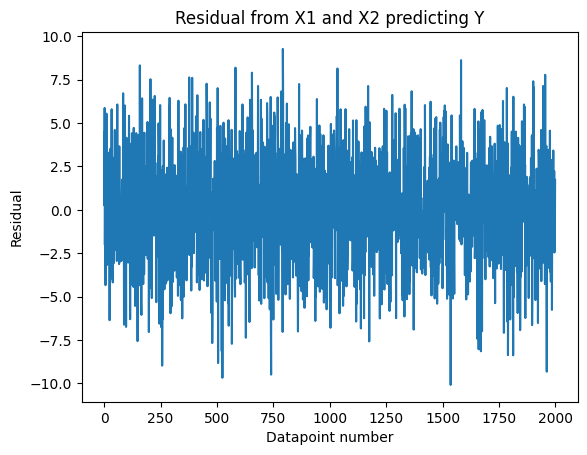

In [37]:
# code
res = (y_pred - y_test).values
plt.plot(res)
plt.title('Residual from X1 and X2 predicting Y')
plt.xlabel('Datapoint number')
plt.ylabel('Residual')
plt.show()

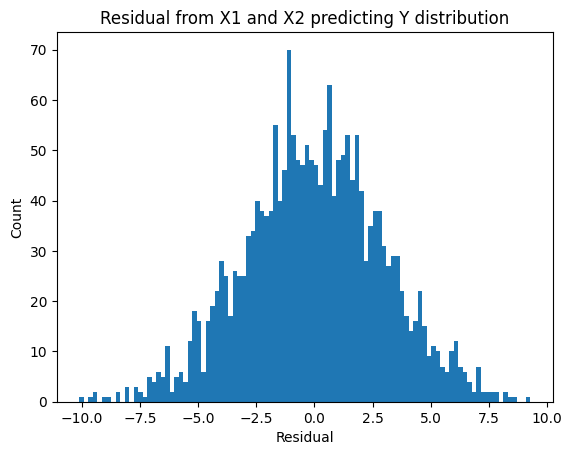

In [38]:
plt.hist(res, bins = 100)
plt.title('Residual from X1 and X2 predicting Y distribution')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## Explain findings

Explain findings

These two graphs show a relatively normal distribution of error, with the error ranging between -10 and 10. These graphs support the R-squared score of approximately 0.80, meaning that this model is a pretty good fit for this dataset.